In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
import warnings

In [44]:
#Data importeren
data = pd.read_excel('data.xlsx', 'Data').T

In [45]:
#ARMA (1,1) model Yt = b0*Yt-1 + Et - b1Et-1
m = pd.DataFrame([data['Ry_res'], data['Ry_res']]).T

Yt = pd.DataFrame(data['Ry_res'])
Yt_1 = pd.DataFrame(Yt.Ry_res.shift(1))
y_matrix = pd.concat([Yt, Yt_1], axis=1)
y_matrix = y_matrix[1:]

EPSt_1 = pd.DataFrame()

#def EPSILONt_1():
#    for i in range (len(data)):
#        EPSt_1 = 

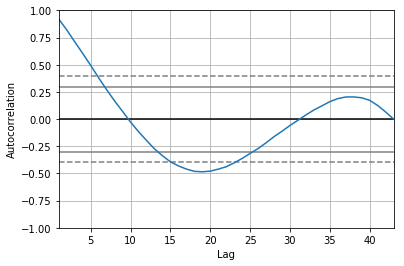

In [46]:
warnings.filterwarnings('ignore')
autocorrelation_plot(Yt)
pyplot.show()

In [71]:
warnings.filterwarnings('ignore')
model = ARIMA(Yt, order=(5,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D2.Ry_res   No. Observations:                   41
Model:                 ARIMA(5, 2, 1)   Log Likelihood                  65.008
Method:                       css-mle   S.D. of innovations              0.049
Date:                Mon, 11 Feb 2019   AIC                           -114.015
Time:                        20:10:35   BIC                           -100.307
Sample:                             2   HQIC                          -109.023
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0031      0.005     -0.570      0.572      -0.014       0.008
ar.L1.D2.Ry_res    -0.9403      0.290     -3.244      0.003      -1.508      -0.372
ar.L2.D2.Ry_res    -0.4935      

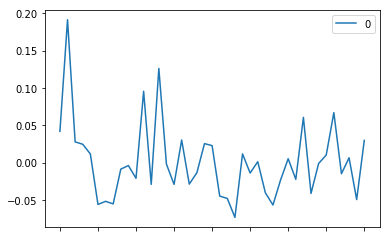

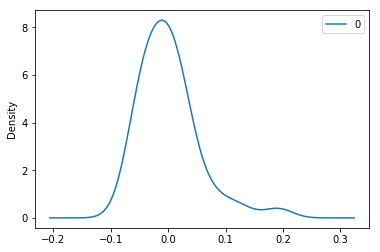

               0
count  41.000000
mean    0.001350
std     0.052155
min    -0.073600
25%    -0.029320
50%    -0.004060
75%     0.024456
max     0.191452


In [72]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [77]:
from sklearn.metrics import mean_squared_error

#Prediction

X = Yt.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    
    model = ARIMA(history, order=(4, 2, 1))
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=44, end=54, typ='levels')
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
    print('predicted=%f, actual=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()
#pyplot.rcParams["figure.figsize"] = [20, 8]

output = pd.DataFrame(output)
predictions = pd.DataFrame(predictions)

line = pd.concat([predictions, output], axis=0, ignore_index=True)
line.rename(columns={0:'Residential RY forecast'}, inplace=True)
#line.plot()
#plt.legend(line)

predicted=5.865835, actual=5.922990
predicted=5.802592, actual=5.755820
predicted=5.618046, actual=5.622730
predicted=5.486151, actual=5.488190
predicted=5.342105, actual=5.422360
predicted=5.284505, actual=5.273300
predicted=5.154611, actual=5.144150
predicted=5.025607, actual=4.991350
predicted=4.859807, actual=4.895730
Test MSE: 0.002


In [95]:
#laatste waarde van observed plus de 12 voorspelde RY's. Zo kan de Yield Shift berekend worden voor de toekomst.
obs = pd.DataFrame(obs)
RY_ys = pd.concat([obs, output], ignore_index=True)

In [96]:
def predict_ys():
    ys = pd.DataFrame()
    for i in range (1, len(RY_ys)):
        ys[i-1] = (RY_ys.iloc[i] - RY_ys.iloc[i-1])/(RY_ys.iloc[i-1])
    return ys[0:len(RY_ys)]

yshat = predict_ys().T
yshat.rename(columns={0:'Predicted YS'}, inplace=True)

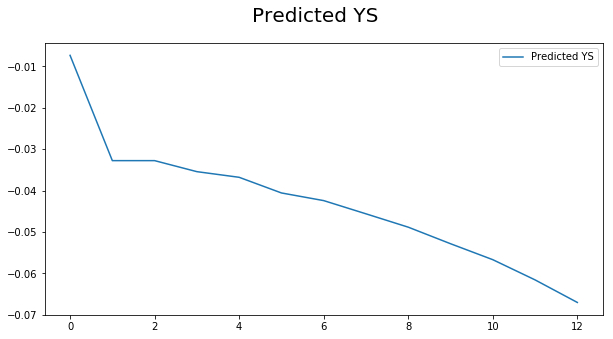

In [99]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Predicted YS', fontsize=20)
lineYS = plt.plot(yshat)
plt.legend(yshat)

locs, labels = plt.xticks()

#plt.xticks(['Q1_2010', 'Q1_2011', 
#            'Q1_2012', 'Q1_2013', 'Q1_2014', 'Q1_2015',
#            'Q1_2016', 'Q1_2017', 'Q1_2018'])

In [103]:
#ARMA (1,1) model Yt = b0*Yt-1 + Et - b1Et-1
hg = pd.DataFrame([data['Hg_res'], data['Hg_res']]).T

Yt_hg = pd.DataFrame(data['Hg_res'])
Yt_1_hg = pd.DataFrame(Yt_hg.Hg_res.shift(1))
y_matrix = pd.concat([Yt_hg, Yt_1_hg], axis=1)
y_matrix = y_matrix[1:]

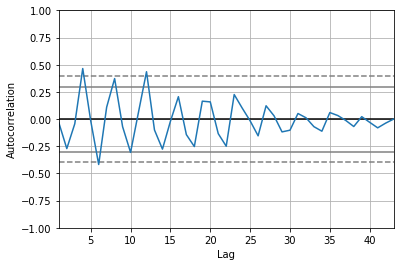

In [104]:
warnings.filterwarnings('ignore')
autocorrelation_plot(Yt_hg)
pyplot.show()

In [121]:
warnings.filterwarnings('ignore')
model = ARIMA(Yt_hg, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Hg_res   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 156.407
Method:                       css-mle   S.D. of innovations              0.006
Date:                Mon, 11 Feb 2019   AIC                           -304.813
Time:                        20:32:35   BIC                           -297.862
Sample:                             1   HQIC                          -302.265
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0001   6.44e-05      1.981      0.055    1.37e-06       0.000
ar.L1.D.Hg_res    -0.0731      0.164     -0.447      0.658      -0.394       0.248
ma.L1.D.Hg_res    -1.0000      0.072

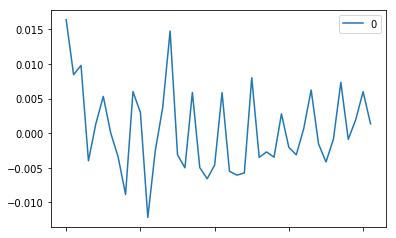

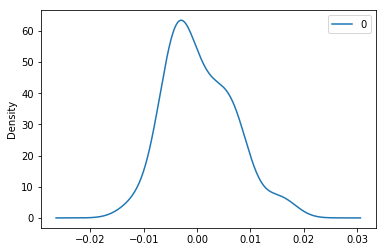

               0
count  42.000000
mean    0.000471
std     0.006167
min    -0.012167
25%    -0.003869
50%    -0.000883
75%     0.005723
max     0.016379


In [122]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [144]:
#Prediction

X_hg = Yt_hg.values
size = int(len(X_hg) * 0.80)
train, test = X[0:size], X_hg[size:len(X_hg)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    
    model = ARIMA(history, order=(1, 0, 1))
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=44, end=54)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
    print('predicted=%f, actual=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()
#pyplot.rcParams["figure.figsize"] = [20, 8]

output = pd.DataFrame(output)
predictions = pd.DataFrame(predictions)

line = pd.concat([predictions, output], axis=0, ignore_index=True)
line.rename(columns={0:'Residential RY forecast'}, inplace=True)
#line.plot()
#plt.legend(line)

predicted=5.950537, actual=0.013811
predicted=5.801581, actual=0.005932
predicted=1.687540, actual=0.004003
predicted=0.574534, actual=0.007460
predicted=0.460739, actual=0.015527
predicted=0.395947, actual=0.007027
predicted=0.337442, actual=0.010599
predicted=0.306785, actual=0.014572
predicted=0.283673, actual=0.009929
Test MSE: 8.067


In [ ]:
def predict_HW():
    hw = pd.DataFrame()
    for i in range (1, len(RY_ys)):
        ys[i-1] = (RY_ys.iloc[i] - RY_ys.iloc[i-1])/(RY_ys.iloc[i-1])
    return ys[0:len(RY_ys)]